---
title: Downloading Climate Data from CHIRPS v3
short_title: CHIRPS v3
---

In this notebook we demonstrate how to fetch [CHIRPS v3 daily precipitation](https://www.chc.ucsb.edu/data/chirps3) for a DHIS2 organisation unit level, download only the needed spatial **bounding box**, and open and inspect the downloaded files as an **xarray** object (ready for aggregation/analytics in a later step). 

This notebook mirrors the ERA5-Land download flow, but rather than requesting a bounding box from a remote service, it reads only the needed spatial window directly from efficiently tiled global GeoTIFF files. 

--------------------------------------------
## Import libraries

We start by importing the necessary libraries:

In [ ]:
import geopandas as gpd
import xarray as xr

from dhis2eo.data.chc import chirps3

--------------------------------------------
## Load organisation units

Load organisation units for Sierra Leone. The resulting GeoDataFrame is used to derive a bounding box.

In [23]:
org_units = gpd.read_file('../../data/sierra-leone-districts.geojson')
org_units

,type,id,name,hasCoordinatesDown,hasCoordinatesUp,level,grandParentParentGraph,grandParentId,parentGraph,parentId,parentName,dimensions,weight,geometry
0,Polygon,O6uvpzGd5pu,Bo,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-11.5914 8.4875, -11.5906 8.4769, -1..."
1,Polygon,fdc6uOvgoji,Bombali,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-11.8091 9.2032, -11.8102 9.1944, -1..."
2,MultiPolygon,lc3eMKXaEfw,Bonthe,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"MULTIPOLYGON (((-12.5568 7.3832, -12.5574 7.38..."
3,Polygon,jUb8gELQApl,Kailahun,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-10.7972 7.5866, -10.8002 7.5878, -1..."
4,MultiPolygon,PMa2VCrupOd,Kambia,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"MULTIPOLYGON (((-13.1349 8.8471, -13.1343 8.84..."
5,Polygon,kJq2mPyFEHo,Kenema,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-11.3596 8.5317, -11.3513 8.5234, -1..."
6,Polygon,qhqAxPSTUXp,Koinadugu,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-10.585 9.0434, -10.5877 9.0432, -10..."
7,Polygon,Vth0fbpFcsO,Kono,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"POLYGON ((-10.585 9.0434, -10.5848 9.0432, -10..."
8,MultiPolygon,jmIPBj66vD6,Moyamba,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"MULTIPOLYGON (((-12.6351 7.6613, -12.6346 7.66..."
9,MultiPolygon,TEQlaapDQoK,Port Loko,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{ },1,"MULTIPOLYGON (((-13.119 8.4718, -13.1174 8.470..."


--------------------------------------------
## Download CHIRPS v3 daily precipitation for the org unit bounding box

CHIRPS v3 daily data are distributed in an [online archive](https://data.chc.ucsb.edu/products/CHIRPS/v3.0/) of daily precipitation GeoTIFFs. For easier access and analysis, we can use the `dhis2eo.data.chc.chirps3` module to download the daily data and save them as monthly NetCDF datasets for more efficient storage. 

#### Parameters

We define the `start` and `end` parameters to only get precipitation data for the months of July, August, and September 2025, and set the bounding box (`bbox`) to only get data for the spatial extent of the org units. 

We also specify a `dirname` for where the data should be saved and a `prefix` for naming the downloaded files. 

In [20]:
start = "2025-07"
end = "2025-09"
bbox = org_units.total_bounds
dirname = '../../data/local'
prefix = 'chirps3-daily'

#### Download the files

Running the download function will save the data files as monthly NetCDF files to the specified location. After downloading, the function returns a list of file paths, which in our case consists of three NetCDF files for July, August, and September:

In [25]:
files = chirps3.daily.download(start=start, end=end, bbox=bbox, dirname=dirname, prefix=prefix)
files

INFO - 2026-01-15 13:34:43,562 - dhis2eo.data.chc.chirps3.daily - Fetching CHIRPS v3 daily from 2025-7 to 2025-9 (inclusive)
INFO - 2026-01-15 13:34:43,563 - dhis2eo.data.chc.chirps3.daily - Stage/flavor: final/rnl
INFO - 2026-01-15 13:34:43,565 - dhis2eo.data.chc.chirps3.daily - BBox: [-13.3035   6.9176 -10.2658  10.0004]
INFO - 2026-01-15 13:34:43,567 - dhis2eo.data.chc.chirps3.daily - Month 2025-7
INFO - 2026-01-15 13:34:43,569 - dhis2eo.data.chc.chirps3.daily - File already downloaded: C:\Users\karimba\Documents\Github\climate-tools\docs\guides\data\local\chirps3-daily_2025-07.nc
INFO - 2026-01-15 13:34:43,571 - dhis2eo.data.chc.chirps3.daily - Month 2025-8
INFO - 2026-01-15 13:34:43,574 - dhis2eo.data.chc.chirps3.daily - File already downloaded: C:\Users\karimba\Documents\Github\climate-tools\docs\guides\data\local\chirps3-daily_2025-08.nc
INFO - 2026-01-15 13:34:43,576 - dhis2eo.data.chc.chirps3.daily - Month 2025-9
INFO - 2026-01-15 13:34:43,579 - dhis2eo.data.chc.chirps3.daily 

[WindowsPath('C:/Users/karimba/Documents/Github/climate-tools/docs/guides/data/local/chirps3-daily_2025-07.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/climate-tools/docs/guides/data/local/chirps3-daily_2025-08.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/climate-tools/docs/guides/data/local/chirps3-daily_2025-09.nc')]

The download function treats the files saved under the given `dirname` and `prefix` as a cache, so it can safely be rerun multiple times without re-downloading. To ignore the cache and fetch fresh data you can set `overwrite=True`.

#### Inspect the data

There are many ways to work with the downloaded files. One way is to pass the list to `xr.open_mfdataset` which will open them as single xarray dataset:

In [18]:
ds = xr.open_mfdataset(files)

If we inspect the contents of the dataset, we see that the main variable is precipitation (`precip`), and contains daily data from the July, August, and September month files in the `time` dimension:

In [27]:
ds

<xarray.Dataset> Size: 3MB
Dimensions:      (time: 92, y: 63, x: 62)
Coordinates:
  * time         (time) datetime64[ns] 736B 2025-07-01 2025-07-02 ... 2025-09-30
  * x            (x) float64 496B -13.32 -13.27 -13.22 ... -10.37 -10.32 -10.27
  * y            (y) float64 504B 10.02 9.975 9.925 9.875 ... 7.025 6.975 6.925
    spatial_ref  int64 8B 0
Data variables:
    precip       (time, y, x) float64 3MB dask.array<chunksize=(31, 63, 62), meta=np.ndarray>
Attributes:
    bbox:     [-13.3035   6.9176 -10.2658  10.0004]
    dataset:  CHIRPS v3 (daily)
    stage:    final
    flavor:   rnl

Finally, let’s see what the precipitation data looks like for 31 August:

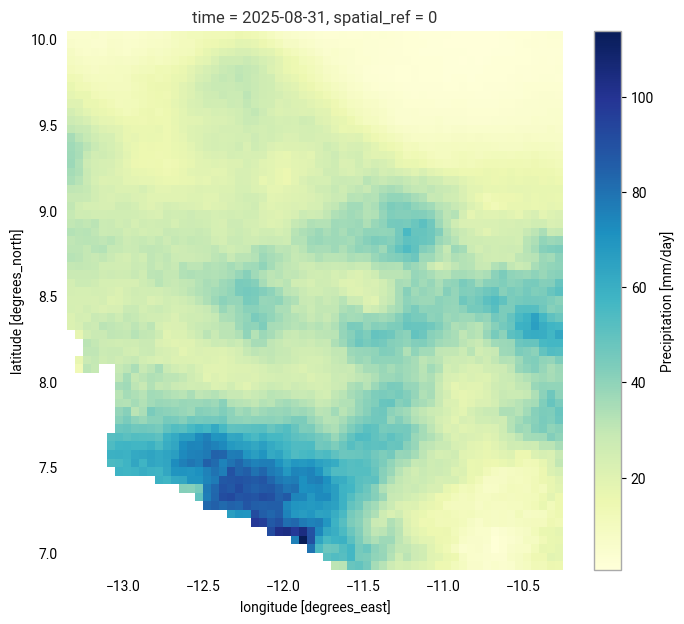

In [37]:
ds.sel(time='2025-08-31', method='nearest')['precip'].plot(cmap='YlGnBu')

## Next steps

This notebook has shown how to download daily CHIRPS v3 precipitation data to your local file system conveniently stored as monthly NetCDF files. For guidance on what to do with the data after downloading, see: 

* [Aggregate the data](../../aggregation/intro.md).
* [Import the aggregated data to DHIS2](../../import-data/intro.md).

If you want an example of how this can be integrated into a complete workflow, see this [example notebook](../../../workflows/import-chirps3/import-chirps3-daily.ipynb) that goes through all the steps to download and import CHIRPS v3 data into DHIS2. 